In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dd = pd.read_csv("team6_driver.csv")

#Data Basic Info


Data driver contains 584590 rows and 6 columns. The columns are:
- Customer ID
- State
- Year
- Zip code 1
- Zip code 2
- Target (Hit or No-Hit)

In [ ]:
dd.shape

(584590, 6)

In [ ]:
dd.head(3)

,qpid,state,year,zip5,zip4,target
0,24739084,CT,2020,6801.0,2842.0,0
1,24739091,CT,2020,6801.0,2875.0,1
2,24739121,CT,2020,6801.0,1709.0,0


The data has no duplicate values.

In [ ]:
duplicate = dd[dd['qpid'].duplicated()]
duplicate.shape

#No duplicate ID and rows in driver data

(0, 6)

##State info

The data is collected from 6 states: ['CT', 'MA', 'NH', 'NY', 'NJ', 'PA']
- NJ has most data collected with 261644 number of rows data.
- NH has least data collected with 11264 number of rows data.

In [ ]:
#Unique states

unique_state = dd.state.unique()
unique_state

array(['CT', 'MA', 'NH', 'NY', 'NJ', 'PA'], dtype=object)

In [ ]:

dd.state.value_counts()

NJ    261644
MA     98625
PA     94392
NY     77843
CT     40822
NH     11264
Name: state, dtype: int64

In [ ]:
#Unique year
unique_year = dd.year.unique()
unique_year

array([2020, 2019])

## Year info


The data is distributed into year 2020 and year 2019. Year 2020 has 416283 rows of data and year 2019 has 168307 rows of data. 

In [ ]:
dd.year.value_counts()

2020    416283
2019    168307
Name: year, dtype: int64

In [ ]:
#distribution of target

## Target (Hit and No-Hit) info

The majority of the target data is Hit by customer, which means get credit information back. 

The Hit(target = 0) has 522580 rows and No-hit (target = 1) has 62010 rows.  

In [ ]:
dd.target.value_counts()

0    522580
1     62010
Name: target, dtype: int64

# Exploratary Data Analysis

In [ ]:
dd['year']= dd['year'].map(str)
dd['year'] = dd['year'].astype('category').cat.as_ordered()


In [ ]:
dd_sample = dd.copy()

### Target rate by states

By comparing the No-Hit rate (target rate) by each states, Connecticut state has highest target rate (0.1559) and New Jersey has second high target rate (0.1472). The reason that CT has highest rate is probably because CT has less amount of data collected, and the reason that NJ has such high target rate is probally because NJ has largest amount of data collected.

On the other hand, NH has lowest target rate (0.0376), that might due to least amount of data collected from NJ. 

In [ ]:
pd.pivot_table(data=dd_sample, index='state', values='target', aggfunc=np.mean)

,target
state,
CT,0.155872
MA,0.082910
NH,0.037553
NJ,0.147219
NY,0.042149
PA,0.055587


<Figure size 1080x576 with 0 Axes>

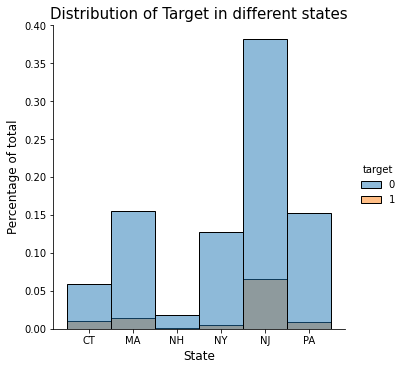

In [ ]:
plt.figure(figsize=(15, 8))
sns.displot(x = "state", stat="density", hue = "target", data = dd_sample)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of total', fontsize=12)
plt.title('Distribution of Target in different states', fontsize=15)
plt.show()

### Target rate by Years

By comparing the target rate by years, the records more than doubled in 2020, while the No-hit rate did not change from year to year.

In [ ]:
pd.pivot_table(data=dd_sample, index='year', values='target', aggfunc=np.mean)

,target
year,
2019,0.105925
2020,0.106135


<Figure size 1080x576 with 0 Axes>

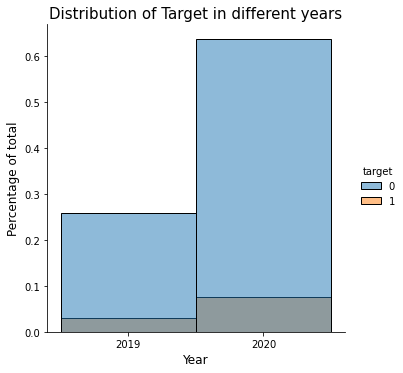

In [ ]:
plt.figure(figsize=(15, 8))
sns.displot(x = "year",stat="density", hue = "target", data = dd_sample)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of total', fontsize=12)
plt.title('Distribution of Target in different years', fontsize=15)
plt.show()

### Target rate by states and years

In the notice by states' target rate changed in year 2019 to year 2020, all the states have not much changed on target rate from two years except Connecticut. Connecticut in year 2019 has target rate = 0.3623, which is extremely high. and in year 2020, Connecticut's target rate is dropped to 0.1099. The huge difference on target rate in Connecticut between two years need more examination and investigations from data collection side. 

In [ ]:
pd.pivot_table(data=dd_sample, index=['year', 'state'], values='target', aggfunc=np.mean)

target
year state          
2019 CT     0.362303
     MA     0.053584
     NH     0.032258
     NJ     0.129444
     NY     0.038097
     PA     0.053423
2020 CT     0.109916
     MA     0.087117
     NH     0.039592
     NJ     0.156380
     NY     0.042777
     PA     0.057639

<Figure size 1080x720 with 0 Axes>

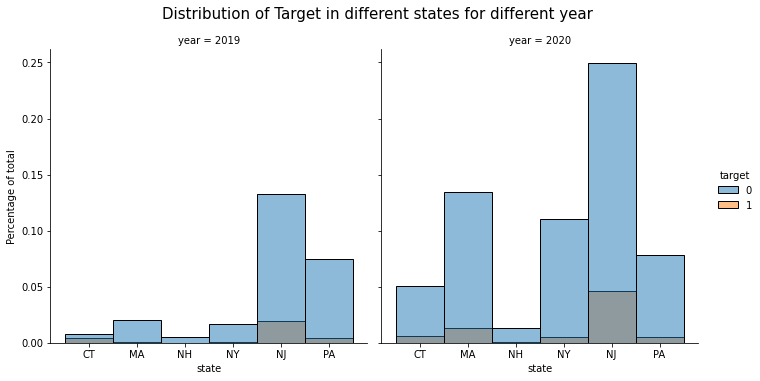

In [ ]:
plt.figure(figsize=(15, 10))
a = sns.displot(x="state", hue="target", col='year', stat="density", data=dd_sample)
a.set_axis_labels( "state" , "Percentage of total" ) 
plt.suptitle('Distribution of Target in different states for different year', fontsize=15 , y=1.05)

plt.show()

In [ ]:
pd.pivot_table(data=dd_sample, index=['state','year'], values='target', aggfunc=np.mean)

target
state year          
CT    2019  0.362303
      2020  0.109916
MA    2019  0.053584
      2020  0.087117
NH    2019  0.032258
      2020  0.039592
NJ    2019  0.129444
      2020  0.156380
NY    2019  0.038097
      2020  0.042777
PA    2019  0.053423
      2020  0.057639

<Figure size 1080x576 with 0 Axes>

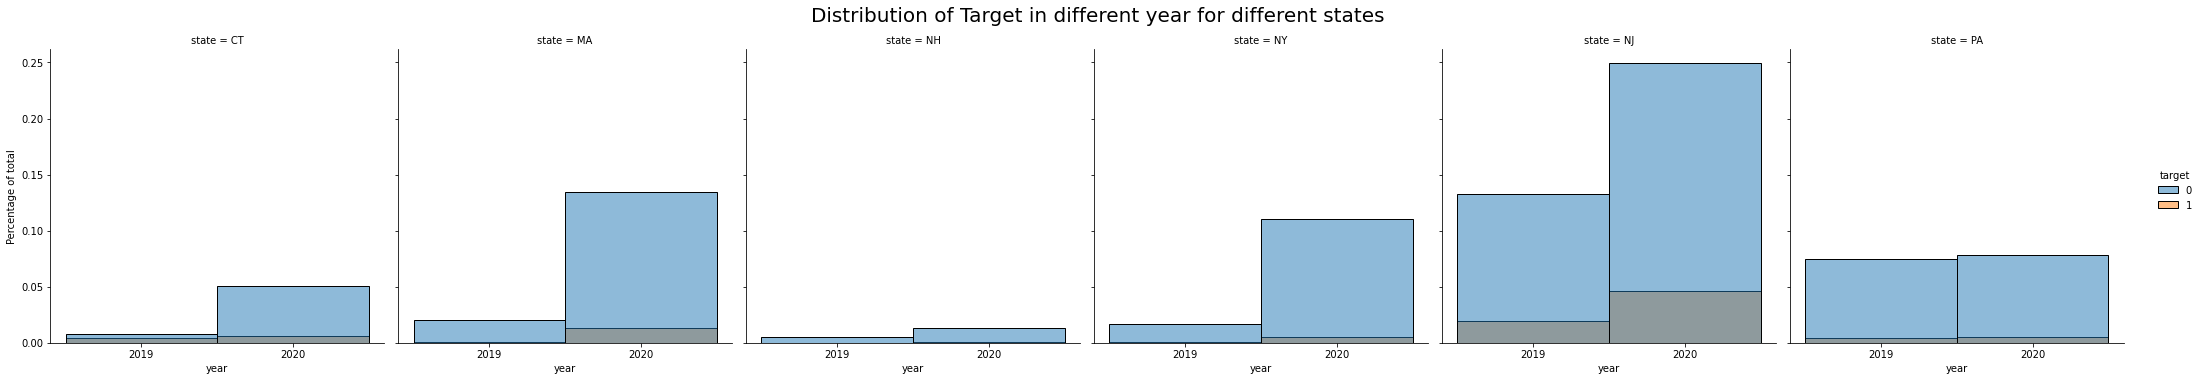

In [ ]:
plt.figure(figsize=(15, 8))
a = sns.displot(x="year", hue="target", col='state', stat="density", data=dd_sample)
a.set_axis_labels( "year" , "Percentage of total" ) 

plt.suptitle('Distribution of Target in different year for different states', fontsize=20, y=1.05)
plt.show()

In 2019 Conneticut has a high No-hit ratio, while it went down significantly in 2020. 

Hypothesis: Are there an changes in No-hit relevant to business growth or changes from the credit bureau side?

In [ ]:
pd.pivot_table(data=dd_sample, index=['state','year'], values='target', aggfunc=np.mean)

target
state year          
CT    2019  0.362303
      2020  0.109916
MA    2019  0.053584
      2020  0.087117
NH    2019  0.032258
      2020  0.039592
NJ    2019  0.129444
      2020  0.156380
NY    2019  0.038097
      2020  0.042777
PA    2019  0.053423
      2020  0.057639

# Test-Train split

We set the data in Year 2020 as training & validation data, and the data in Year 2019 as testing data because:
- Year 2020 is more recent to current time( Year 2021) when we will apply the model, while Year 2019 may test the robustness of the model
- Year 2020 is more stable in business operations and has a larger sample size




In [ ]:
dd_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584590 entries, 0 to 584589
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   qpid    584590 non-null  int64   
 1   state   584590 non-null  object  
 2   year    584590 non-null  category
 3   zip5    583771 non-null  float64 
 4   zip4    575856 non-null  float64 
 5   target  584590 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 22.9+ MB


In [ ]:
X = dd_sample[dd_sample['year']=='2020'].drop("target", axis = 1)

In [ ]:
X.shape

(416283, 5)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
y = dd_sample[dd_sample['year']=='2020']["target"]

In [ ]:
c = dd_sample[dd_sample['year']=='2020'][["state",'target']]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain1, Xtest2020, ytrain1, ytest2020 = train_test_split(X, y, test_size=0.2, random_state=833, stratify = c)

In [ ]:
Xtest2019 = dd_sample[dd_sample['year']=='2019'].drop("target", axis = 1)

In [ ]:
ytest2019 = dd_sample[dd_sample['year']=='2019']["target"]

<Figure size 1080x576 with 0 Axes>

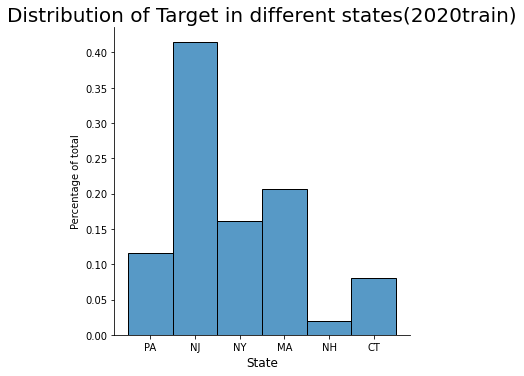

In [ ]:
plt.figure(figsize=(15, 8))
sns.displot(x = "state", stat="density", data = Xtrain1)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of total', fontsize=10)
plt.title('Distribution of Target in different states(2020train)', fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

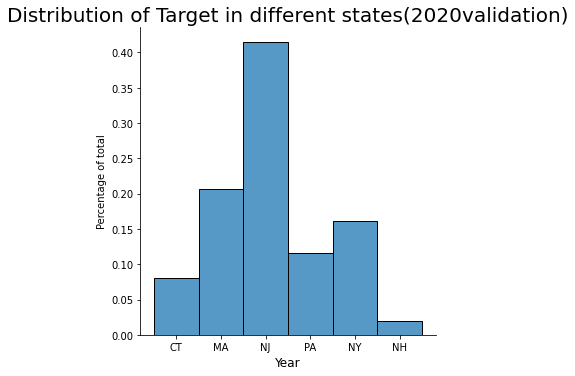

In [ ]:
plt.figure(figsize=(15, 8))
sns.displot(x = "state", stat="density", data = Xtest2020)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of total', fontsize=10)
plt.title('Distribution of Target in different states(2020validation)', fontsize=20)
plt.show()

We stratified the data using target(Hit or No-Hit) & state variables. We have checked that training and validation have the same target & state distribution as the original Year 2020 data.

In [ ]:
ytrain1.value_counts(normalize=True)

0    0.893864
1    0.106136
Name: target, dtype: float64

In [ ]:
ytest2020.value_counts(normalize=True)

0    0.893871
1    0.106129
Name: target, dtype: float64

In [ ]:
Xtrain1.state.value_counts(normalize=True)

NJ    0.414757
MA    0.207194
NY    0.161897
PA    0.116405
CT    0.080207
NH    0.019539
Name: state, dtype: float64

In [ ]:
Xtest2020.state.value_counts(normalize=True)

NJ    0.414752
MA    0.207202
NY    0.161908
PA    0.116399
CT    0.080209
NH    0.019530
Name: state, dtype: float64

In [ ]:
Xtest2019.state.value_counts(normalize=True)

NJ    0.528724
PA    0.272924
MA    0.073514
NY    0.062071
CT    0.044163
NH    0.018603
Name: state, dtype: float64

In [ ]:
ytest2019.value_counts(normalize=True)

0    0.894075
1    0.105925
Name: target, dtype: float64